In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import *
from sklearn.neural_network import MLPClassifier
from itertools import cycle

In [10]:
data = pd.read_csv('./Iris.csv')
X = data.drop(columns='Species', axis=1)
Y = data['Species']
Y = Y.map({
    'Iris-setosa' : 0,
    'Iris-versicolor' : 1,
    'Iris-virginica' : 2
})
Y = Y.values.reshape(-1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=7)
mlp = MLPClassifier(hidden_layer_sizes=(6,4), learning_rate_init=0.1, random_state=7, verbose=False)
mlp.fit(X_train,Y_train)
mlp.loss_curve_

[5.091833120089403,
 1.1128657802409463,
 1.1460568034299399,
 1.1519913623310054,
 1.1496674929087287,
 1.141374429956453,
 1.128411826234249,
 1.1069886137818572,
 2.1264702992740347,
 2.1593413360981266,
 1.0648676393646284,
 1.0921122169980302,
 1.0999070528756703,
 1.1034061012550838,
 1.104272933345745,
 1.1036596883959904,
 1.1021725445702264,
 1.1002733368956434,
 1.0982357670322729,
 1.096257705233503,
 1.0945111314922784,
 1.0931105677701876]

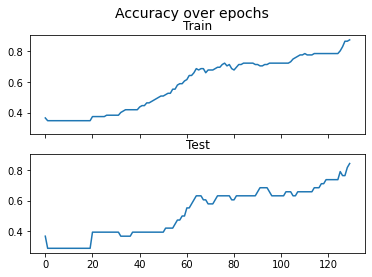

In [11]:

import numpy as np
import matplotlib.pyplot as plt

TRAIN_SAMPLES = X_train.shape[0]
EPOCHS = 130
BATCH = 128
CLASSES = np.unique(Y_train)

scores_train = []
scores_test = []
epoch = 0

while epoch < EPOCHS:
    random_perm = np.random.permutation(X_train.shape[0])
    mini_batch_index = 0
    
    while True:
        indices = random_perm[mini_batch_index:mini_batch_index+BATCH]
        mlp.partial_fit(X_train.iloc[indices],Y_train[indices],classes=CLASSES)
        mini_batch_index += BATCH
        
        if mini_batch_index >= TRAIN_SAMPLES:
            break
    
    scores_train.append(mlp.score(X_train,Y_train))
    scores_test.append(mlp.score(X_test,Y_test))
    epoch += 1
    
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(scores_train)
ax[0].set_title('Train')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.show()

In [12]:
predictions = mlp.predict(X_test)
print(accuracy_score(Y_test,predictions))

0.8421052631578947


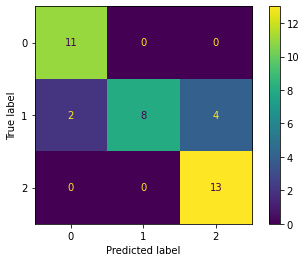

In [13]:
ConfusionMatrixDisplay.from_predictions(Y_test,predictions)

In [18]:
TN , FP , FN , TP = confusion_matrix(list(Y_test), list(predictions), labels = [0,1]).ravel()

In [19]:
print(TP)
print(TN)
print(FP)
print(FN)

8
11
0
2


In [14]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.57      0.73        14
           2       0.76      1.00      0.87        13

    accuracy                           0.84        38
   macro avg       0.87      0.86      0.84        38
weighted avg       0.87      0.84      0.83        38



In [15]:
pred_proba = mlp.predict_proba(X_test)
roc_auc_score(Y_test,pred_proba,multi_class='ovr')

0.960873015873016

In [16]:
roc_auc_score(Y_test,pred_proba,multi_class='ovo')

0.9642857142857143

In [17]:
Setosa_X = data.drop(columns = 'Species', axis=1)
Setosa_Y = data['Species']
Setosa_Y = Setosa_Y.map({
    'Iris-setosa':1,
    'Iris-versicolor':0,
    'Iris-virginica':0
})
Setosa_Y = Setosa_Y.values.reshape(-1)
sMlp

NameError: name 'sMlp' is not defined